In [101]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
from astropy.table import Table
from nikkos_tools import stat_functions as sf
from nikkos_tools import miscellaneous_functions as mf
import data_management

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

LINE_SIGNAL_TO_NOISE = 3

RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']
COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
PRISM_COLOR = COLORS[2]
G395M_COLOR = COLORS[1]

OII_COLOR = COLORS[0]
NEIII_COLOR = COLORS[1]
HB_COLOR = COLORS[2]
OIII_4959_COLOR = COLORS[3]
OIII_5007_COLOR = COLORS[4]
HA_COLOR = COLORS[5]
SII_COLOR = COLORS[5]


In [2]:
line_fluxes = pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

Hadf_prism = line_fluxes_prism[data_management.signal_to_noise_Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hadf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hadf_both = pd.merge(Hadf_prism, Hadf_g395m, on='id', how='inner')

Hbdf_prism = line_fluxes_prism[data_management.signal_to_noise_Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hbdf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hbdf_both = pd.merge(Hbdf_prism, Hbdf_g395m, on='id', how='inner')


O3df_prism = line_fluxes_prism[data_management.signal_to_noise_5007_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
O3df_g395m = line_fluxes_g395m[data_management.signal_to_noise_5007_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)



In [ ]:
def plot_OIIIHb_versus_redshift(ax):
    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_OIII_Hb_sphinx, yerr=[sphinx_binned.log_OIII_Hb_sphinx_16, sphinx_binned.log_OIII_Hb_sphinx_84], ms=10, marker='s', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O3Hbdf_prism.z_prism, y=np.log10(O3Hbdf_prism.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_prism.OIII_Hb,O3Hbdf_prism.OIII_Hb_ERR_84)], 
                ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O3Hbdf_g395m.z_g395m, y=np.log10(O3Hbdf_g395m.OIII_Hb), 
                yerr=[sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3Hbdf_g395m.OIII_Hb,O3Hbdf_g395m.OIII_Hb_ERR_84)], 
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.04*z + 0.16, 0.10*z + 0.36, color='k', alpha=0.1)
    ax.plot(z, 0.07*z + 0.26, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O3Hbdf_prism)+len(O3Hbdf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    ax.axis([0, 11, -0.75, 1.5])

def plot_NeIIIOII_versus_redshift(ax):
    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_NeIII_OII_sphinx, 
                yerr=[sphinx_binned.log_NeIII_OII_sphinx_16, sphinx_binned.log_NeIII_OII_sphinx_84], 
                ms=10, marker='s', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=Ne3O2df_prism.z_prism, y=np.log10(Ne3O2df_prism.NeIII_OII), 
             yerr=[sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_prism.NeIII_OII, Ne3O2df_prism.NeIII_OII_ERR_84)], 
             ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=Ne3O2df_g395m.z_g395m, y=np.log10(Ne3O2df_g395m.NeIII_OII), 
                yerr=[sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2df_g395m.NeIII_OII, Ne3O2df_g395m.NeIII_OII_ERR_84)], 
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')
    z = np.linspace(1,9,1000)
    ax.fill_between(z, 0.03*z - 0.71, 0.07*z - 0.51, color='k', alpha=0.1)
    ax.plot(z, 0.05*z - 0.61, color='k', alpha=0.3, label='Backhaus+2024')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([0, 11, -1, 1.5])

def plot_O32_versus_redshift(ax):
    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_O32_sphinx, yerr=[sphinx_binned.log_O32_sphinx_16, sphinx_binned.log_O32_sphinx_84], ms=10, marker='s', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=O32df_prism.z_prism, y=np.log10(O32df_prism.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_prism.O32,O32df_prism.O32_ERR_84)], 
                ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=O32df_g395m.z_g395m, y=np.log10(O32df_g395m.O32), 
                yerr=[sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32df_g395m.O32,O32df_g395m.O32_ERR_84)],
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32df_prism)+len(O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
    ax.axis([0, 11, -1.5, 2])

def plot_R23_versus_redshift(ax):
    ax.errorbar(x=sphinx_binned.redshift, y=sphinx_binned.log_R23_sphinx, 
                yerr=[sphinx_binned.log_R23_sphinx_16, sphinx_binned.log_R23_sphinx_84], 
                ms=10, marker='s', c='k', zorder=-9, label='SPHINX')
    ax.errorbar(x=R23df_prism.z_prism, y=np.log10(R23df_prism.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', color=PRISM_COLOR, marker='o', mec='k', zorder=-1, label='PRISM')
    ax.errorbar(x=R23df_g395m.z_g395m, y=np.log10(R23df_g395m.R23), 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', color=G395M_COLOR, marker='o', mec='k', zorder=-1, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel('Redshift')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    ax.axis([0, 11, 0, 1.3])

def generate_legend_elements_ratios_versus_redshift():
    legend_elements = [
                   Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='o', color='none', label='G395M', markerfacecolor=G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='SPHINX', markerfacecolor='k', markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

def plot_OIIIHb_versus_Ha(ax):
    ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_OIII_Hb, c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O3HbHadf_prism.L_Ha), y=np.log10(O3HbHadf_prism.OIII_Hb), 
            xerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.L_Ha,O3HbHadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_prism.OIII_Hb,O3HbHadf_prism.OIII_Hb_ERR_84)],
            ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O3HbHadf_g395m.L_Ha), y=np.log10(O3HbHadf_g395m.OIII_Hb), 
                xerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.L_Ha,O3HbHadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_16), sf.propagate_uncertainty_log10(O3HbHadf_g395m.OIII_Hb,O3HbHadf_g395m.OIII_Hb_ERR_84)],
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')

    ax.annotate(f'N = {len(O3HbHadf_prism)+len(O3HbHadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[O~III]}~\lambda5008}{\rm{H}\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -0.6, 1.3])

def plot_NeIIIOII_versus_Ha(ax):
    ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_NeIII_OII, c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(Ne3O2Hadf_prism.L_Ha), y=np.log10(Ne3O2Hadf_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.L_Ha,Ne3O2Hadf_prism.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_prism.NeIII_OII,Ne3O2Hadf_prism.NeIII_OII_ERR_84)],
                ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(Ne3O2Hadf_g395m.L_Ha), y=np.log10(Ne3O2Hadf_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.L_Ha,Ne3O2Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O2Hadf_g395m.NeIII_OII,Ne3O2Hadf_g395m.NeIII_OII_ERR_84)],
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')
    ax.annotate(f'N = {len(Ne3O2Hadf_prism)+len(Ne3O2Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1, 1.5])

def plot_O32_versus_Ha(ax):
    ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_O32, c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(O32Hadf_prism.L_Ha), y=np.log10(O32Hadf_prism.O32), 
            xerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.L_Ha,O32Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_prism.O32,O32Hadf_prism.O32_ERR_84)],
            ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(O32Hadf_g395m.L_Ha), y=np.log10(O32Hadf_g395m.O32), 
                xerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.L_Ha,O32Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(O32Hadf_g395m.O32,O32Hadf_g395m.O32_ERR_84)],
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')
    ax.annotate(f'N = {len(O32Hadf_prism)+len(O32Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\rm{O32} \equiv \frac{\rm{[O~III]}~\lambda5008}{\rm{[O~II]}~\lambda\lambda3727,3729}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, -1.2, 2])

def plot_R23_versus_Ha(ax):
    ax.errorbar(x=np.log10(R23Hadf_prism.L_Ha), y=np.log10(R23Hadf_prism.R23), 
            xerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.L_Ha,R23Hadf_prism.L_Ha_ERR_84)],
            yerr=[sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_prism.R23,R23Hadf_prism.R23_ERR_84)],
            ls='None', color=PRISM_COLOR, marker='o', mec='k', label='PRISM')
    ax.errorbar(x=np.log10(R23Hadf_g395m.L_Ha), y=np.log10(R23Hadf_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.L_Ha,R23Hadf_g395m.L_Ha_ERR_84)],
                yerr=[sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23Hadf_g395m.R23,R23Hadf_g395m.R23_ERR_84)],
                ls='None', color=G395M_COLOR, marker='o', mec='k', label='G395M')

    ax.scatter(np.log10(sphinxdf["H__1_6562.80A_int"]), sphinxdf.log_R23, c='k', alpha=0.1, label='SPHINX')

    ax.annotate(f'N = {len(R23Hadf_prism)+len(R23Hadf_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log L_{H\alpha}$')
    ax.set_ylabel(r'$\log\rm{R23} \equiv \log\frac{\rm{[O~III]}~\lambda\lambda 4959,5008 + \rm{[O~II]}~\lambda\lambda3727,3730}{H\beta}$')
    secax = ax.secondary_xaxis('top', functions=(lambda x: x-41.27, lambda x: x+41.27))
    secax.set_xlabel(r'$\log SFR_{H\alpha}$ [$M_\odot~yr^{-1}$]', labelpad=6.0)
    ax.axis([39, 44, 0, 1.3])

def generate_legend_elements_ratios_versus_Ha():
    legend_elements = [
                #    Line2D([1], [1], color='k', alpha=0.3, label='Backhaus+2024', markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor=PRISM_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='o', color='none', label='G395M', markerfacecolor=G395M_COLOR, markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='o', color='none', label='SPHINX', markerfacecolor='k', alpha=0.3, markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

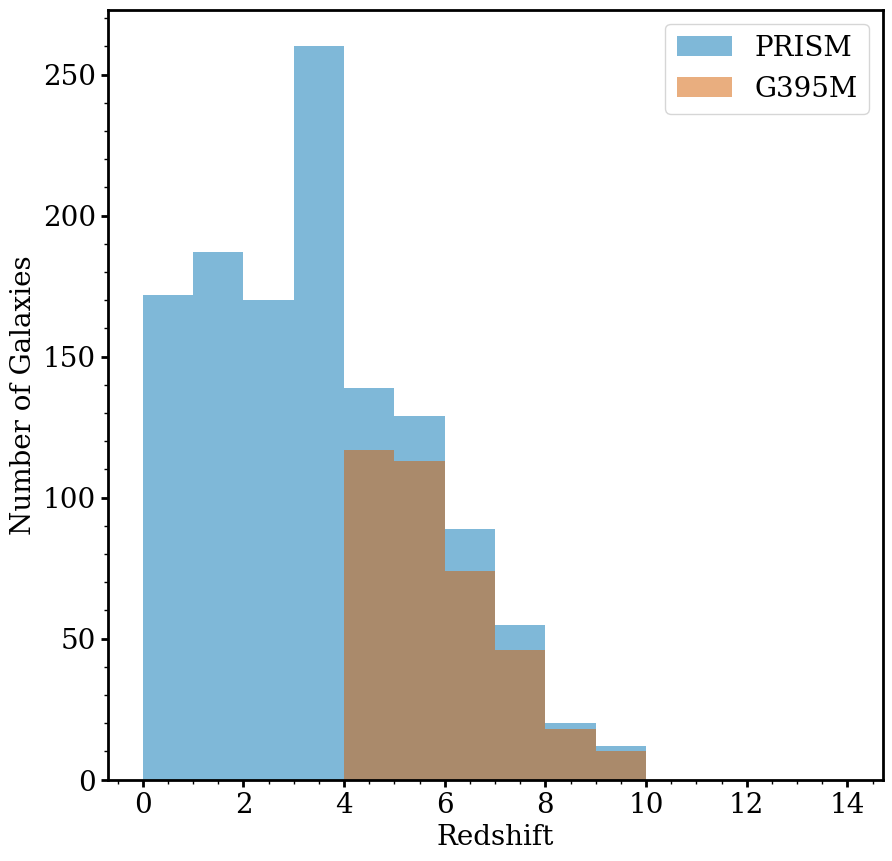

In [90]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(line_fluxes_prism.z_prism, color=PRISM_COLOR, alpha=0.5, bins=bins, label='PRISM')
plt.hist(line_fluxes_g395m.z_g395m, color=G395M_COLOR, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()


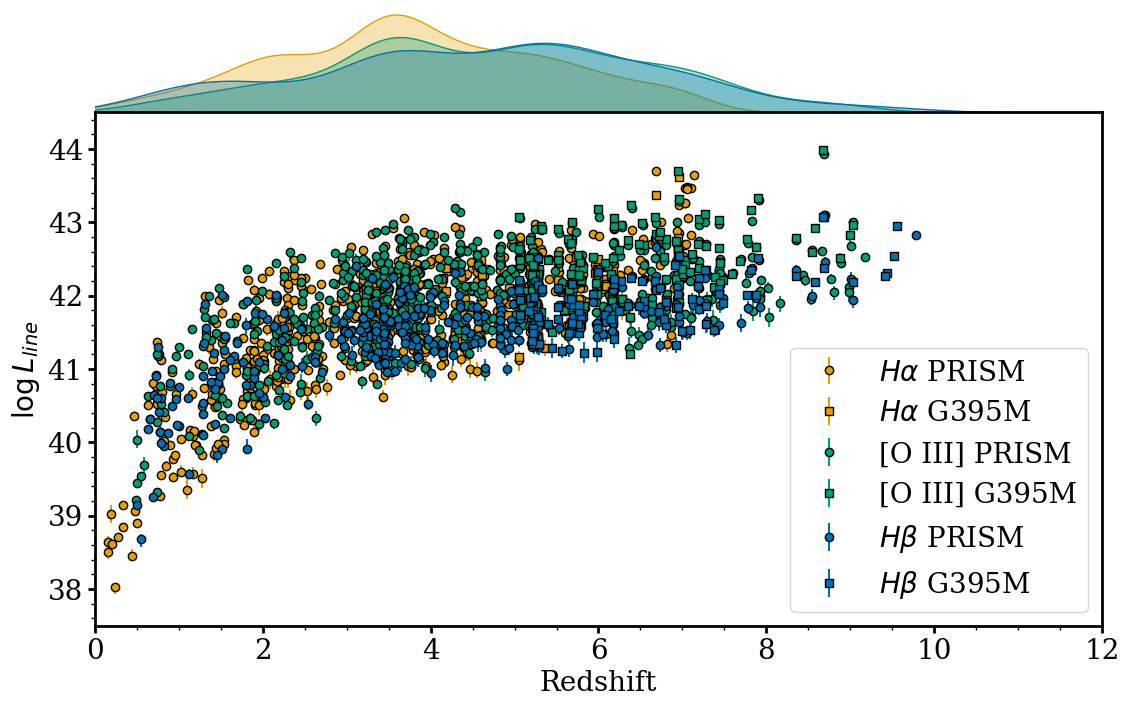

In [4]:
fig = plt.figure(figsize=(13,8))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace=0, hspace=0)

bins = np.arange(0,15,0.1)
ax1 = fig.add_subplot(gs[0:2, 0:10], frameon=False)
ax1.tick_params(left=False, labelleft=False, right = False , labelbottom = False, bottom = False, labeltop = False, top = False, which = 'both')
sns.kdeplot(data=np.concatenate((Hadf_prism.z_prism, Hadf_g395m.z_g395m)), color=HA_COLOR, alpha=0.3, fill=True, ax=ax1)
sns.kdeplot(data=np.concatenate((O3df_prism.z_prism, O3df_g395m.z_g395m)), color=OIII_5007_COLOR, alpha=0.3, fill=True, ax=ax1)
sns.kdeplot(data=np.concatenate((Hbdf_prism.z_prism, Hbdf_g395m.z_g395m)), color=HB_COLOR, alpha=0.3, fill=True, ax=ax1)
ax1.set_xlim([0,12])

ax = fig.add_subplot(gs[2:12, 0:10])

ax.errorbar(x=Hadf_prism.z_prism, y=np.log10(Hadf_prism.L_Ha), 
            yerr=[sf.propagate_uncertainty_log10(Hadf_prism.L_Ha,Hadf_prism.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Hadf_prism.L_Ha,Hadf_prism.L_Ha_ERR_84)],
            ls='None', marker='o', mec='k', color=HA_COLOR, label=r'$H\alpha$ PRISM')
ax.errorbar(x=Hadf_g395m.z_g395m, y=np.log10(Hadf_g395m.L_Ha), 
            yerr=[sf.propagate_uncertainty_log10(Hadf_g395m.L_Ha,Hadf_g395m.L_Ha_ERR_16), sf.propagate_uncertainty_log10(Hadf_g395m.L_Ha,Hadf_g395m.L_Ha_ERR_84)],
            ls='None', marker='s', mec='k', color=HA_COLOR, label=r'$H\alpha$ G395M')

ax.errorbar(x=O3df_prism.z_prism, y=np.log10(O3df_prism.L_OIII_5007), 
            yerr=[sf.propagate_uncertainty_log10(O3df_prism.L_OIII_5007,O3df_prism.L_OIII_5007_ERR_16), sf.propagate_uncertainty_log10(O3df_prism.L_OIII_5007,O3df_prism.L_OIII_5007_ERR_84)],
            ls='None', marker='o', mec='k', color=OIII_5007_COLOR, label=r'[O III] PRISM')
ax.errorbar(x=O3df_g395m.z_g395m, y=np.log10(O3df_g395m.L_OIII_5007), 
            yerr=[sf.propagate_uncertainty_log10(O3df_g395m.L_OIII_5007,O3df_g395m.L_OIII_5007_ERR_16), sf.propagate_uncertainty_log10(O3df_g395m.L_OIII_5007,O3df_g395m.L_OIII_5007_ERR_84)],
            ls='None', marker='s', mec='k', color=OIII_5007_COLOR, label=r'[O III] G395M')

ax.errorbar(x=Hbdf_prism.z_prism, y=np.log10(Hbdf_prism.L_Hb), 
            yerr=[sf.propagate_uncertainty_log10(Hbdf_prism.L_Hb,Hbdf_prism.L_Hb_ERR_16), sf.propagate_uncertainty_log10(Hbdf_prism.L_Hb,Hbdf_prism.L_Hb_ERR_84)],
            ls='None', marker='o', mec='k', color=HB_COLOR, label=r'$H\beta$ PRISM')
ax.errorbar(x=Hbdf_g395m.z_g395m, y=np.log10(Hbdf_g395m.L_Hb), 
            yerr=[sf.propagate_uncertainty_log10(Hbdf_g395m.L_Hb,Hbdf_g395m.L_Hb_ERR_16), sf.propagate_uncertainty_log10(Hbdf_g395m.L_Hb,Hbdf_g395m.L_Hb_ERR_84)],
            ls='None', marker='s', mec='k', color=HB_COLOR, label=r'$H\beta$ G395M')

ax.set_xlabel('Redshift')
ax.set_ylabel(r'$\log L_{line}$')

ax.axis([0,12,37.5,44.5])
ax.legend()

plt.savefig(FIGURES.joinpath('lines_z.pdf'))
plt.show()

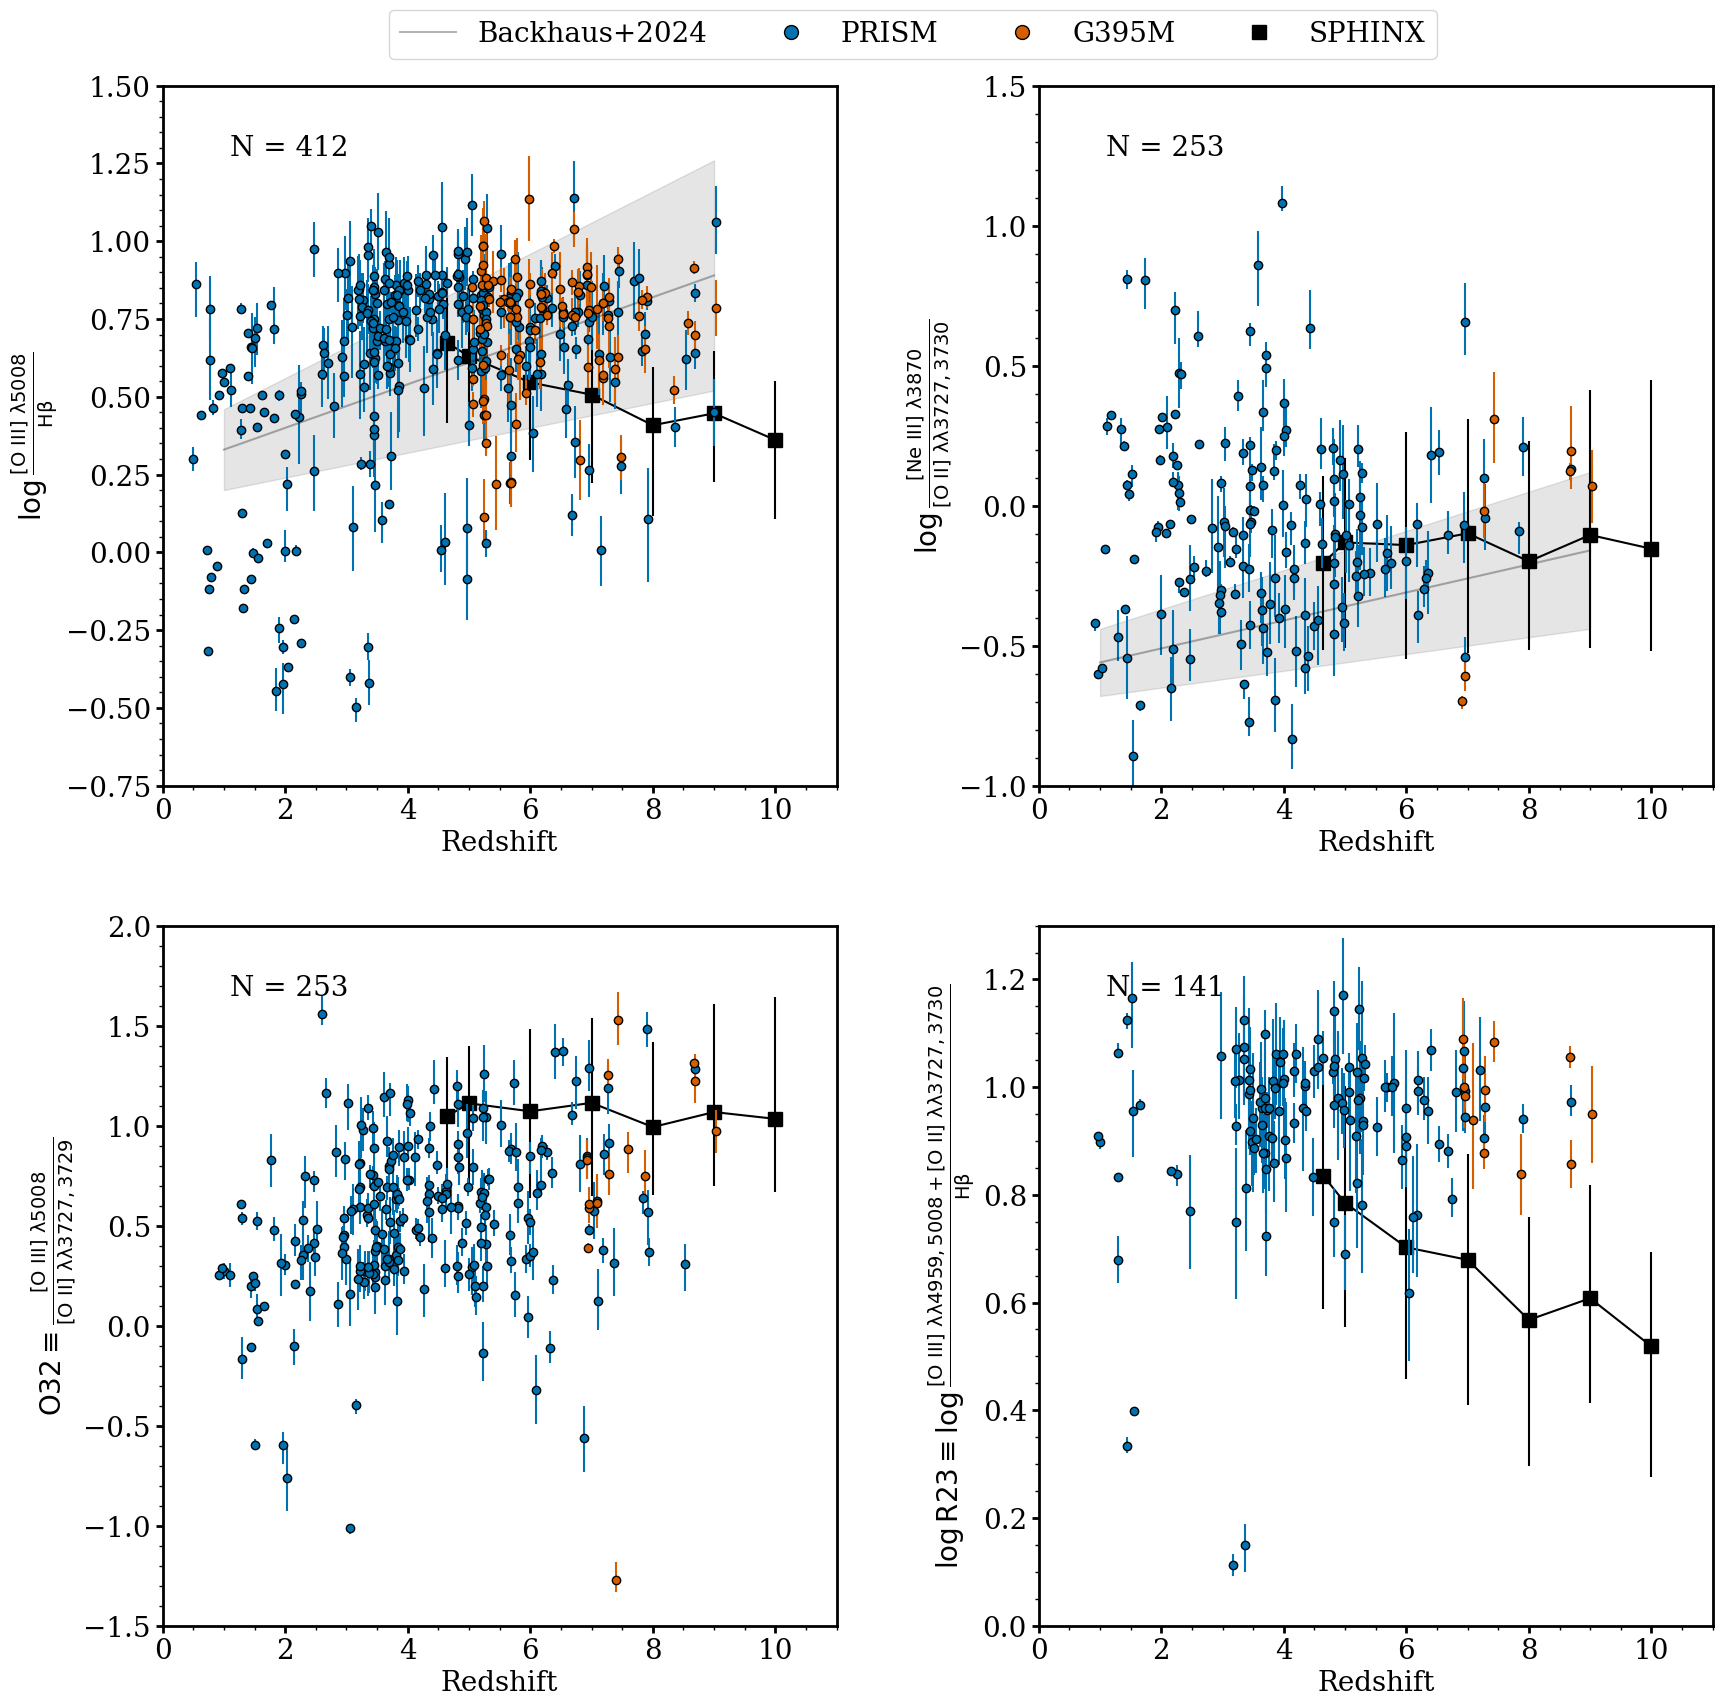

In [61]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.2)

ax0 = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_redshift(ax=ax0)

ax1 = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_redshift(ax=ax1)

ax2 = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_redshift(ax=ax2)

ax3 = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_redshift(ax=ax3)

legend_elements = generate_legend_elements_ratios_versus_redshift()     
# ax0.legend(handles=legend_elements, loc='lower right')
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.925), facecolor='white', ncol=4, fontsize=20)

plt.savefig(FIGURES.joinpath('ratios_z.pdf'))
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


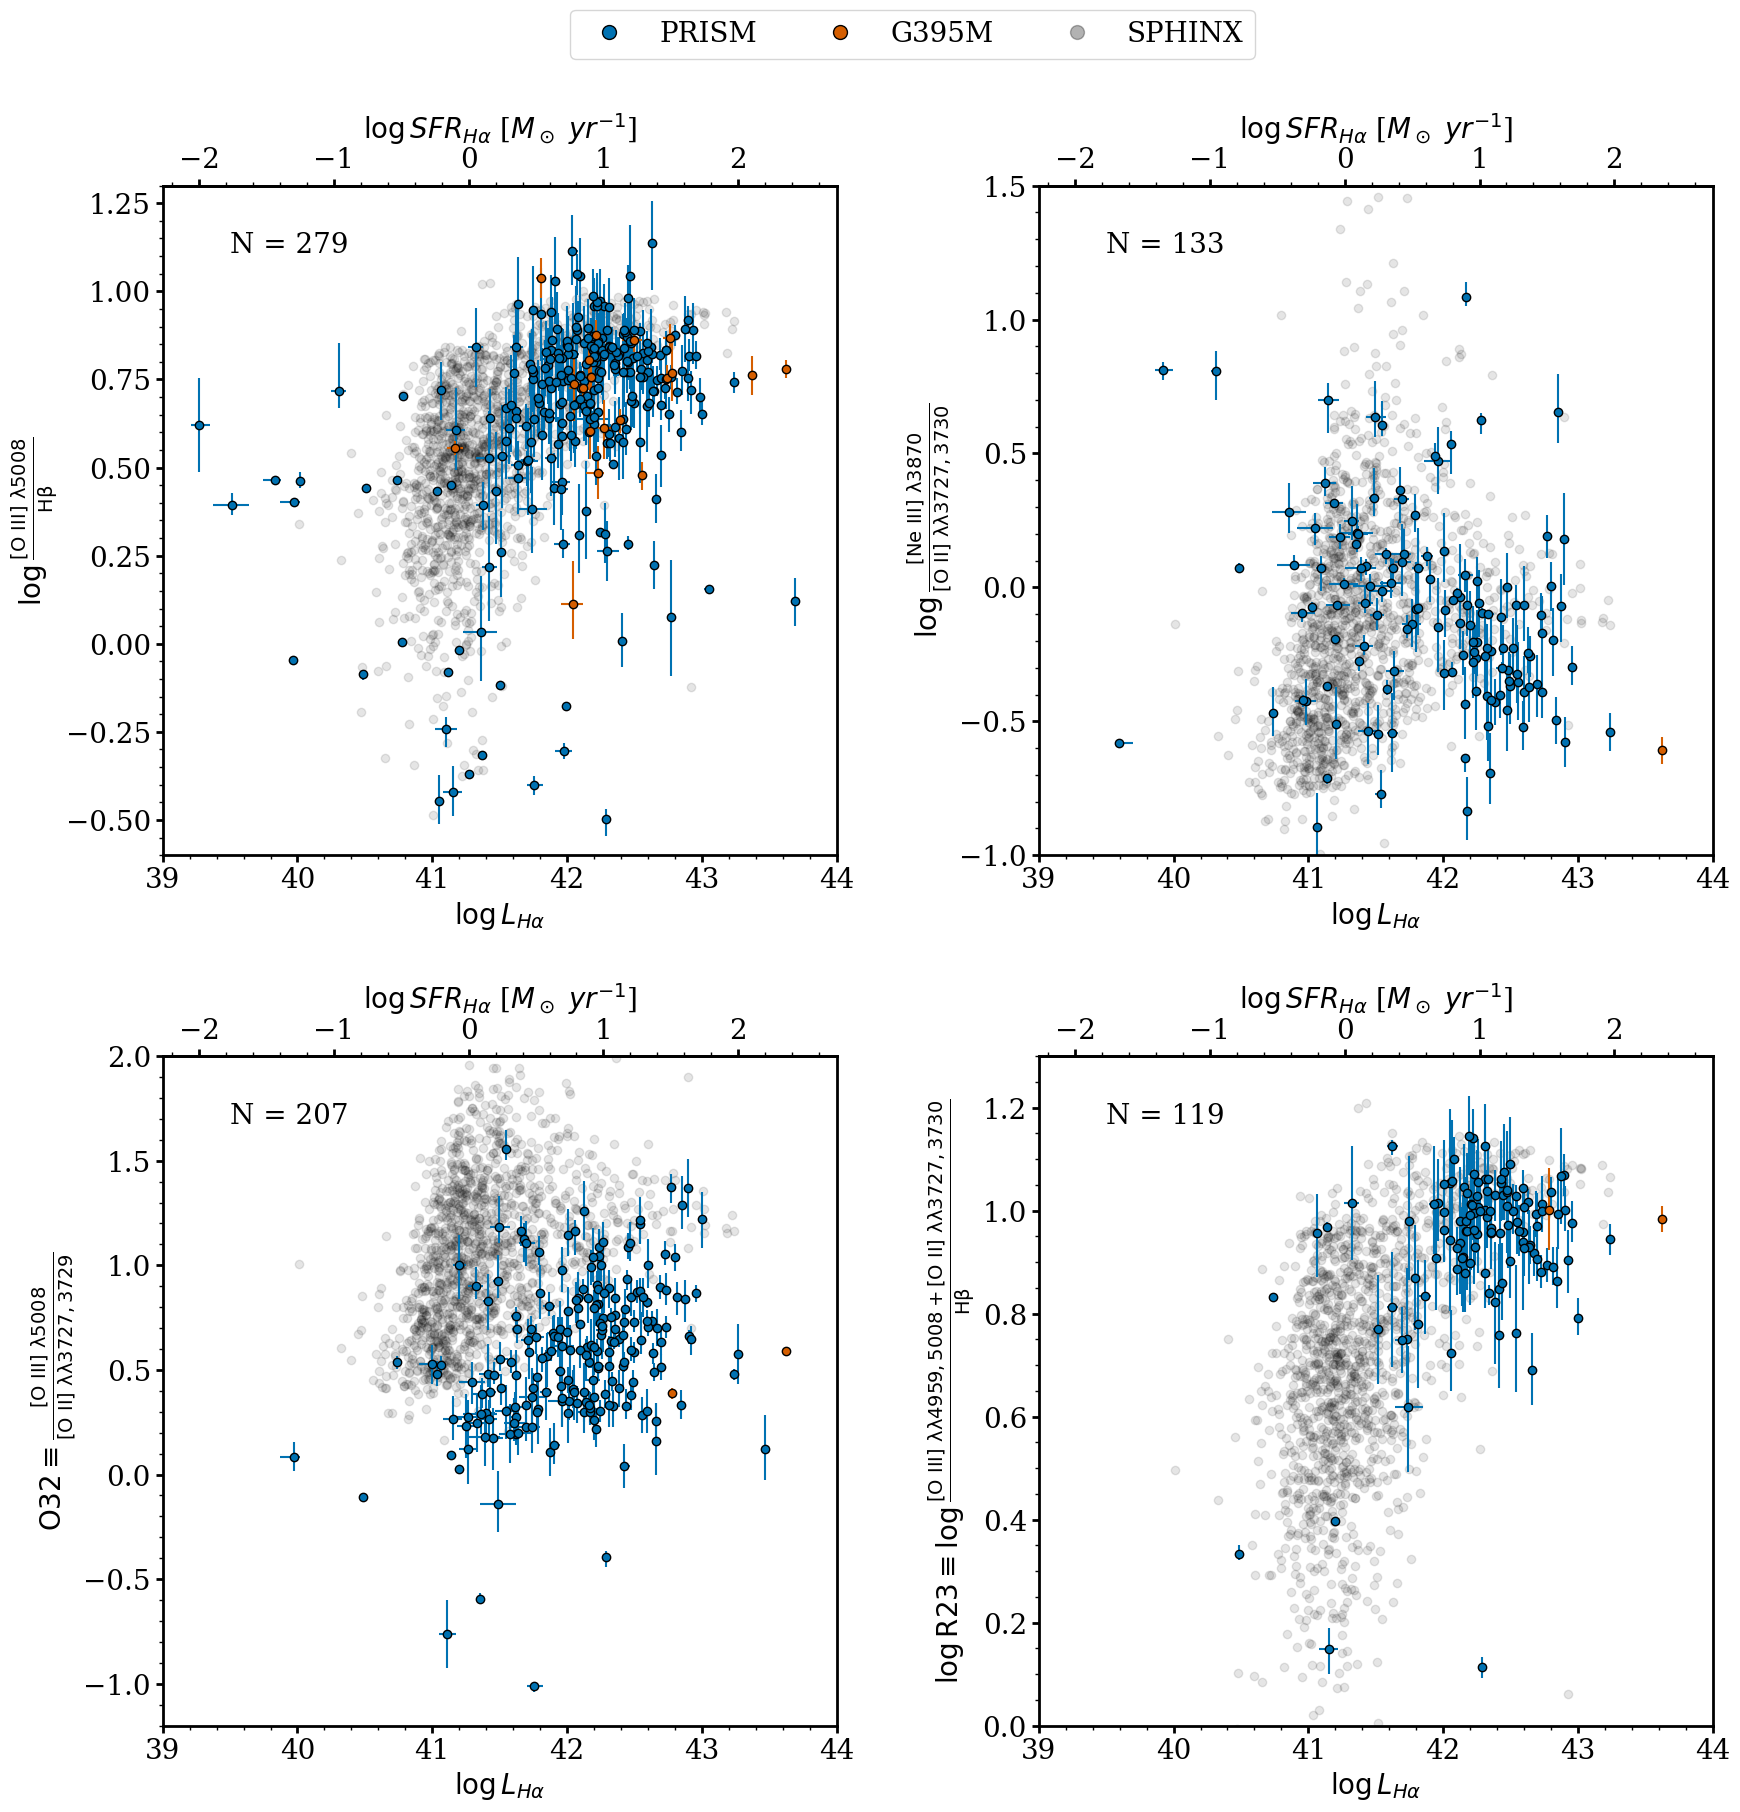

In [89]:
fig = plt.figure(figsize=(20,20))
gs = GridSpec(nrows=2, ncols=2)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0:1, 0:1])
plot_OIIIHb_versus_Ha(ax=ax0)

ax1 = fig.add_subplot(gs[0:1, 1:2])
plot_NeIIIOII_versus_Ha(ax=ax1)

ax2 = fig.add_subplot(gs[1:2, 0:1])
plot_O32_versus_Ha(ax=ax2)

ax3 = fig.add_subplot(gs[1:2, 1:2])
plot_R23_versus_Ha(ax=ax3)

legend_elements = generate_legend_elements_ratios_versus_Ha()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(FIGURES.joinpath('ratios_ha.pdf'))
plt.show()

In [168]:
def plot_R23_versus_O32(ax):
    ax.scatter(sphinxdf.log_O32, sphinxdf.log_R23, c='k', alpha=0.1, label='SPHINX')
    ax.errorbar(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.O32,R23df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_prism.R23,R23df_prism.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_prism.O32), y=np.log10(R23df_prism.R23), 
                marker='o', ec='k', c=R23df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                xerr=[sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.O32,R23df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_16), sf.propagate_uncertainty_log10(R23df_g395m.R23,R23df_g395m.R23_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(R23df_g395m.O32), y=np.log10(R23df_g395m.R23), 
                marker='s', ec='k', c=R23df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(R23df_prism)+len(R23df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\rm{R23}$')
    ax.axis([-1, 2, 0, 1.5])

def plot_NeIIIOII_versus_O32(ax):
    ax.scatter(sphinxdf.log_O32, sphinxdf.log_NeIII_OII, c='k', alpha=0.1, label='SPHINX')

    ax.errorbar(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.O32,Ne3O32df_prism.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_prism.NeIII_OII,Ne3O32df_prism.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_prism.O32), y=np.log10(Ne3O32df_prism.NeIII_OII), 
                marker='o', ec='k', c=Ne3O32df_prism.z_prism, cmap='Reds', vmin=0, vmax=10, s=60, label='PRISM')
    ax.errorbar(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                xerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.O32,Ne3O32df_g395m.O32_ERR_84)], 
                yerr=[sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_16), sf.propagate_uncertainty_log10(Ne3O32df_g395m.NeIII_OII,Ne3O32df_g395m.NeIII_OII_ERR_84)], 
                ls='None', c='k', zorder=-1)
    ax.scatter(x=np.log10(Ne3O32df_g395m.O32), y=np.log10(Ne3O32df_g395m.NeIII_OII), 
                marker='s', ec='k', c=Ne3O32df_g395m.z_g395m, cmap='Reds', vmin=0, vmax=10, s=60, label='G395M')
    ax.annotate(f'N = {len(Ne3O32df_prism)+len(Ne3O32df_g395m)}', xy=(0.1, 0.9), xycoords='axes fraction')
    ax.set_xlabel(r'$\log\rm{O32}$')
    ax.set_ylabel(r'$\log\frac{\rm{[Ne~III]}~\lambda3870}{\rm{[O~II]}~\lambda\lambda3727,3730}$')
    ax.axis([-1,2,-1,1])

def generate_legend_elements_ratios_versus_O32():
    legend_elements = [
                   Line2D([0], [0], marker='o', color='none', label='PRISM', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='s', color='none', label='G395M', markerfacecolor='red', markeredgecolor='black', markersize=np.sqrt(100)),
                   Line2D([0], [0], marker='o', color='none', label='SPHINX', markerfacecolor='k', alpha=0.3, markeredgecolor='black', markersize=np.sqrt(100)),
                    ] 
    return legend_elements

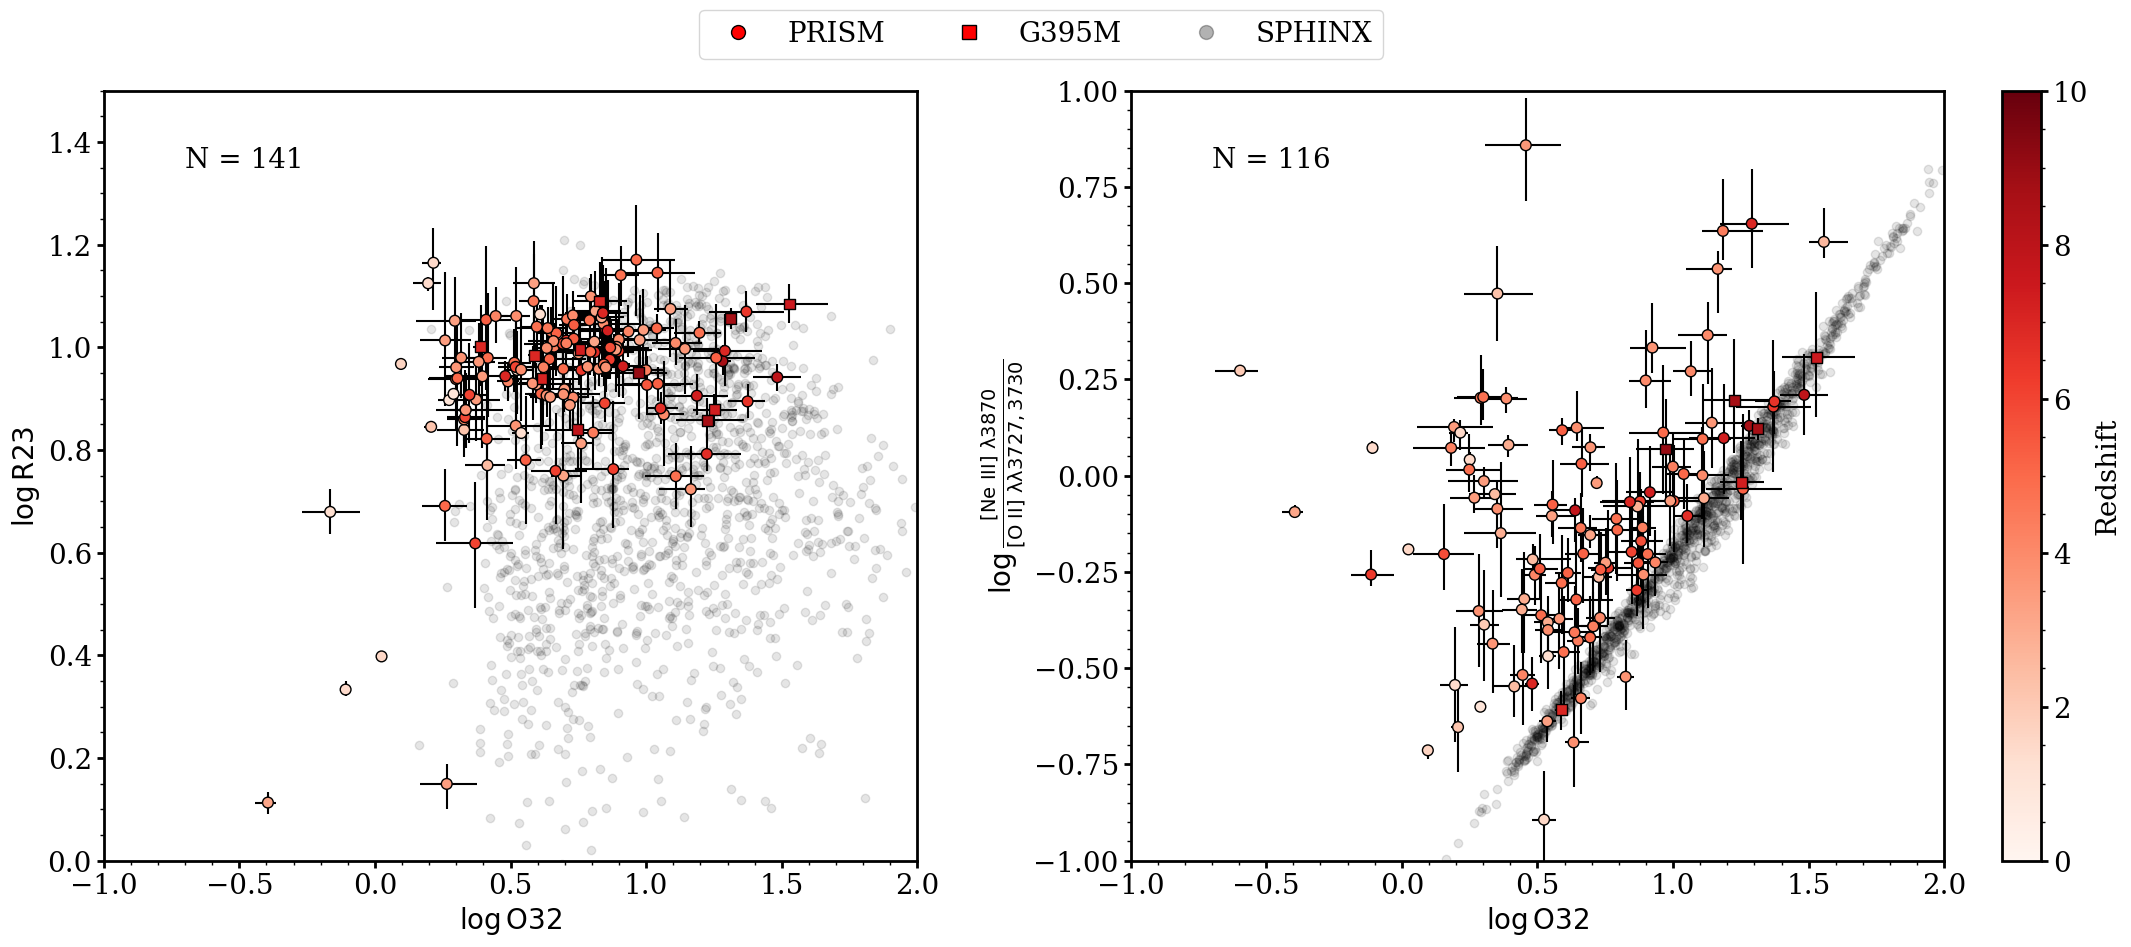

In [169]:
fig = plt.figure(figsize=(25,10))
gs = GridSpec(nrows=1, ncols=100)
gs.update(wspace=0, hspace=0)

ax0 = fig.add_subplot(gs[0:1, 0:42])
plot_R23_versus_O32(ax=ax0)
# plt.savefig(FIGURES.joinpath('R23_O32.pdf'))


ax1 = fig.add_subplot(gs[0:1, 53:95])
plot_NeIIIOII_versus_O32(ax=ax1)

cax = fig.add_subplot(gs[0:1, 98:100])
norm = mpl.colors.Normalize(vmin=0, vmax=10)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Reds'), cax=cax, use_gridspec=True, label='Redshift')

legend_elements = generate_legend_elements_ratios_versus_O32()     
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.975), facecolor='white', ncol=4, fontsize=20)

plt.savefig(FIGURES.joinpath('ratios_O32.pdf'))

plt.show()

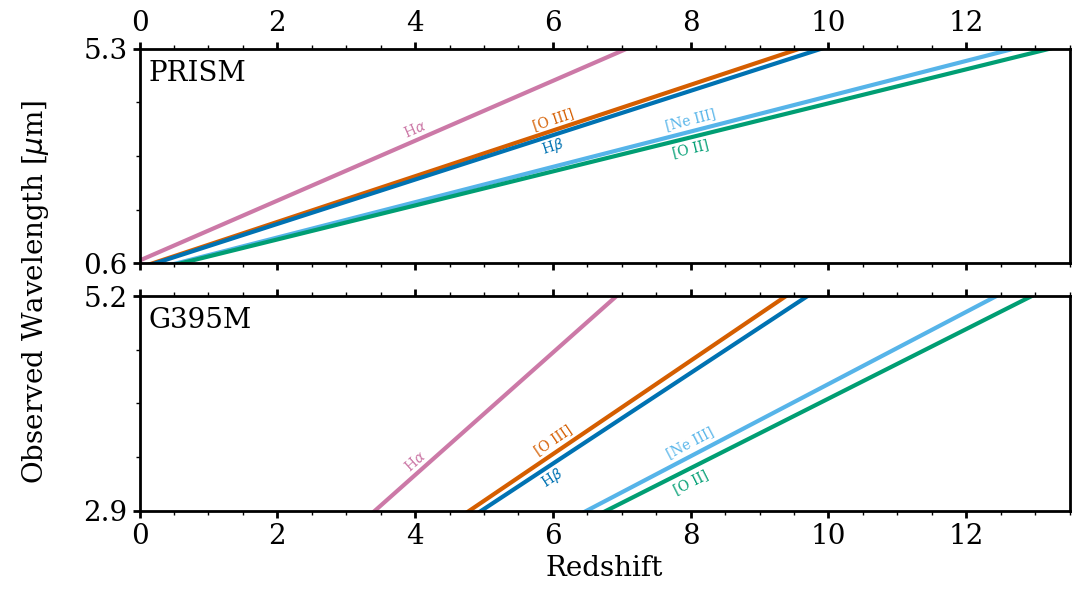

In [14]:
ha = 6563
oiii = 5008
neiii = 3870
hb = 4862
oii = 3728

lines = [ha, oiii, hb, neiii, oii]
labels = [r'H$\alpha$', '[O III]', r'H$\beta$', '[Ne III]', '[O II]']
line_colors = COLORS
offsets_prism = [.25, .25, -.25, .25, -.25]
offsets_g395m = [.15, .15, -.15, .15, -.15]
z_annotations = [4, 6, 6, 8, 8]
z = np.linspace(0, 15, 1000)

def get_zmin_prism(wave):
    return 6000/wave - 1
def get_zmax_prism(wave):
    return 53000/wave - 1

def get_zmin_g395m(wave):
    return 29000/wave - 1
def get_zmax_g395m(wave):
    return 52000/wave - 1
def get_line_rotation(x1,x2,y1,y2):
    return np.rad2deg(np.arctan((y2 - y1)/(x2 - x1)))

fig = plt.figure(figsize=(12,6))
gs = GridSpec(nrows=10, ncols=10)
gs.update(wspace=0, hspace=2)

ax0 = fig.add_subplot(gs[0:5, 0:10])
for line, label, line_color, offset, z_annotation in zip(lines,labels,line_colors,offsets_prism,z_annotations):
    observed_wavelengths = line*(1+z)/10**4
    ax0.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax0.annotate(label, xy=(z_annotation,line*(1+z_annotation)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax0.annotate('PRISM',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
# ax0.legend()
ax0.axis([0,13.5,0.6,5.3])
ax0.set_yticks([0.6,5.3])
ax0.tick_params(labelbottom=False, which='both', top=True, labeltop=True)
# ax0.grid(alpha=0.5, zorder=-5)

ax1 = fig.add_subplot(gs[5:10, 0:10])
for line, label, line_color, offset, z_annotation in zip(lines,labels,line_colors,offsets_g395m,z_annotations):
    observed_wavelengths = line*(1+z)/10**4
    ax1.plot(z, observed_wavelengths, lw=3, color=line_color, label=label)
    rotn = get_line_rotation(z[0], z[-1], observed_wavelengths[0], observed_wavelengths[-1])
    ax1.annotate(label, xy=(z_annotation,line*(1+z_annotation)/10**4+offset), fontsize=10, va='center', ha='center', color=line_color,
                 rotation=rotn, transform_rotates_text=True, rotation_mode='anchor')
ax1.axis([0,13.5,2.9,5.2])
ax1.annotate('G395M',  xy=(0.01,0.95), va='top', ha='left', xycoords='axes fraction')
ax1.set_yticks([2.9,5.2])
ax1.tick_params(which='both', top=True)
plt.xlabel('Redshift')
plt.annotate(r'Observed Wavelength [$\mu$m]', va='center', ha='center', xy=(0.03,0.5), xycoords='figure fraction', rotation=90)
plt.savefig(FIGURES.joinpath('coverage.pdf'))
plt.show()

In [67]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [68]:
egs_photometrydf

,id,ra,dec,z_spec,z_16,z_50,z_84,mtot_16,mtot_50,mtot_84,...,UV_84,VJ_16,VJ_50,VJ_84,gi_16,gi_50,gi_84,ug_16,ug_50,ug_84
0,314,215.047219,52.873545,1.0792,1.066959,1.081151,1.093502,7.663324,7.959884,8.144108,...,0.571482,-0.322055,-0.197852,-0.061830,-0.114493,-0.033172,0.057216,0.368097,0.488109,0.643127
1,482,215.055700,52.881958,2.4795,2.466267,2.479461,2.492917,10.342180,10.546886,10.728413,...,1.516407,1.639147,1.717575,1.788404,1.209361,1.261519,1.315392,1.401962,1.486741,1.564780
2,761,215.048281,52.879975,3.4749,3.460055,3.473852,3.488612,8.999971,9.286930,9.565404,...,0.614665,0.157427,0.333753,0.524187,0.138138,0.183933,0.219282,0.445031,0.518839,0.602441
3,920,215.052344,52.884268,3.6213,3.606445,3.618377,3.634835,8.759178,9.008563,9.229348,...,0.335386,-0.328727,-0.104180,0.017901,-0.145954,-0.105428,-0.075021,0.285114,0.329636,0.365150
4,921,215.049804,52.882520,4.6191,4.606992,4.620721,4.633611,7.999528,8.249279,8.503069,...,0.507230,-0.245120,-0.027888,0.162618,-0.101650,-0.017435,0.053855,0.278632,0.370020,0.483905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,975193,214.967248,52.963630,6.9899,6.990930,7.001648,7.007428,8.124916,8.336600,8.582315,...,0.364252,-1.342373,-1.122922,-0.803765,-0.529217,-0.459257,-0.379925,-0.132223,-0.073191,-0.000226
632,978590,214.830660,52.887775,7.7616,7.747797,7.760693,7.774701,8.987303,9.334288,9.755920,...,1.200153,0.329156,0.861999,1.471908,0.431347,0.710257,1.050598,0.772538,0.956267,1.150985
633,980841,214.844770,52.892109,8.6937,8.680703,8.695250,8.707724,9.328617,9.623724,9.887245,...,0.739568,-0.194869,0.190751,0.642494,0.063064,0.219559,0.373995,0.349845,0.428431,0.510854
634,986615,214.950932,52.957040,6.5036,6.488228,6.499406,6.515163,8.763231,9.048732,9.360532,...,0.539225,-0.309389,-0.111038,0.118091,-0.107790,-0.006101,0.099194,0.397051,0.454037,0.514091


In [104]:
uds_photometrydf.columns

Index(['id_v70', 'id', 'ra', 'dec', 'z_spec', 'z_16', 'z_50', 'z_84',
       'mtot_16', 'mtot_50', 'mtot_84', 'mstar_16', 'mstar_50', 'mstar_84',
       'met_16', 'met_50', 'met_84', 'mwa_16', 'mwa_50', 'mwa_84', 'dust2_16',
       'dust2_50', 'dust2_84', 'dust_index_16', 'dust_index_50',
       'dust_index_84', 'dust1_fraction_16', 'dust1_fraction_50',
       'dust1_fraction_84', 'logfagn_16', 'logfagn_50', 'logfagn_84',
       'sfr10_16', 'sfr10_50', 'sfr10_84', 'sfr30_16', 'sfr30_50', 'sfr30_84',
       'sfr100_16', 'sfr100_50', 'sfr100_84', 'ssfr10_16', 'ssfr10_50',
       'ssfr10_84', 'ssfr30_16', 'ssfr30_50', 'ssfr30_84', 'ssfr100_16',
       'ssfr100_50', 'ssfr100_84', 'rest_U_16', 'rest_U_50', 'rest_U_84',
       'rest_V_16', 'rest_V_50', 'rest_V_84', 'rest_J_16', 'rest_J_50',
       'rest_J_84', 'rest_u_16', 'rest_u_50', 'rest_u_84', 'rest_g_16',
       'rest_g_50', 'rest_g_84', 'rest_i_16', 'rest_i_50', 'rest_i_84',
       'UV_16', 'UV_50', 'UV_84', 'VJ_16', 'VJ_50', 'VJ_84',

In [103]:
photometrydf = pd.concat([egs_photometrydf, uds_photometrydf])